# Shelly-Ann Duncan
# 11/30/22
# Hypothesis Testing with Insurance Data (Core)

# We have been asked to use our hypothesis testing skills to answer the following questions:

* - Q1. Do smokers have higher insurance charges than non-smokers?
* - Q2. Are men more likely to smoke than women?
* - Q3. Do different regions have different charges, on average?

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy

In [2]:
# load data
url = 'Data/insurance - insurance.csv'
df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## State the Hypothesis & Null Hypothesis


- $H_0$ (Null Hypothesis): There is no difference in insurance charges between smokers and non-smokers
- $H_A$ (Alternative Hypothesis): Smokers have higher insurance charges than non-smokers

## Determine the correct test to perform
- Type of Data? Numeric
- How many groups/samples? 2 samples(smokers, non-smokers)
- Therefore which test is appropriate? sample T test

## Visualize and separate data for hypothesis
- What column is the target? charges
- What column determines the group? smoker

In [3]:
# check the columns that contain the charges
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [4]:
# check the column that contains info on smoker
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# create filters for smokers and non smokers 
smoker = df.loc[df['smoker'] == 'yes'].copy()
non_smoker = df.loc[df['smoker'] == 'no'].copy()

In [12]:
# define the feature of interest
smoker_charges = smoker['charges']
nonsmoker_charges = non_smoker['charges']
print(smoker_charges)
print()
print(nonsmoker_charges)

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


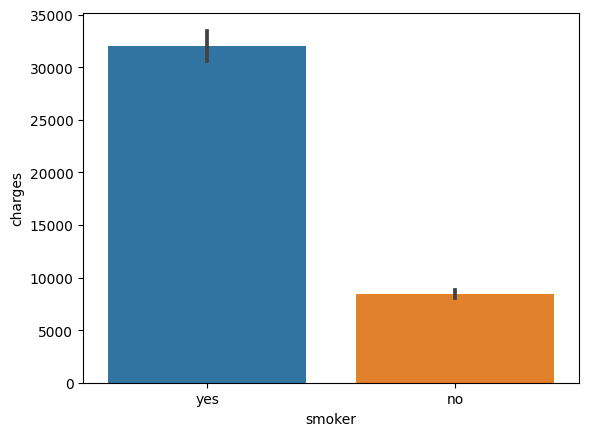

In [14]:
# visulaize the group
sns.barplot(data = df, x = 'smoker', y = 'charges');